In [49]:
from numpy import *
from keras import *
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.layers.noise import GaussianDropout
import tensorflow as tf


In [2]:
import pickle
import gzip

In [297]:
f = gzip.open('../codes/2019_MachineLearningForPhysicists/mnist.pkl.gz', 'rb')
training_data, validation_data, test_data = pickle.load(f,encoding='bytes')
f.close()

In [25]:
tr_d[0][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = zeros((10))
    e[j] = 1.0
    return e

In [298]:
global training_inputs, training_results
global validation_inputs, validation_results
global test_inputs, test_results
global num_samples, numpixels, num_test_samples
tr_d, va_d, te_d = training_data, validation_data, test_data
num_samples=len(tr_d[0])
numpixels=784

###training results ####
training_inputs=zeros([num_samples,numpixels])
training_results=zeros([num_samples,10])
for j in range(num_samples):
    training_inputs[j,:] = reshape(tr_d[0][j], (numpixels))
    training_results[j,:] = vectorized_result(tr_d[1][j])
##### test inputs ####
num_test_samples=len(te_d[0])
test_inputs=zeros([num_test_samples,numpixels])
test_results=zeros([num_test_samples,10])    
for j in range(num_test_samples):
    test_inputs[j,:] = reshape(te_d[0][j], (numpixels))
    test_results[j,:] = vectorized_result(te_d[1][j])

###validation ####
num_test_samples=len(va_d[0])
validation_inputs=zeros([num_test_samples,numpixels])
validation_results=zeros([num_test_samples,10])    
for j in range(num_test_samples):
    validation_inputs[j,:] = reshape(va_d[0][j], (numpixels))
    validation_results[j,:] = vectorized_result(va_d[1][j])

In [34]:
test_results[0]


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [31]:
def display_image(which):
    global test_inputs
    
    plt.imshow(reshape(test_inputs[which,:],[28,28]),interpolation='nearest', cmap='binary')
    plt.show()

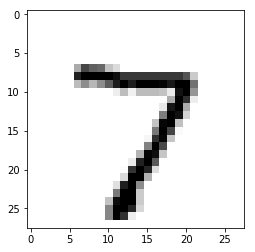

In [33]:
display_image(0)

In [107]:
# initialize the network
def init_net():
    global net, numpixels
    net = Sequential()
    # note: batch_input_shape is (batchsize,timesteps,data_dim)
    net.add(Dense(30, input_shape=(numpixels,), activation='relu'))
    net.add(Dense(10, activation='softmax'))
    net.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=1.0), metrics=['categorical_accuracy'])

In [146]:
# initialize the network
def init_net():
    global net, numpixels
    net = Sequential()
    # note: batch_input_shape is (batchsize,timesteps,data_dim)
    net.add(Dense(100, input_shape=(numpixels,), activation='relu'))
    net.add(GaussianDropout(0.1))
    net.add(Dense(100, activation='relu'))
    net.add(GaussianDropout(0.1))
    net.add(Dense(100, activation='relu'))
    net.add(Dense(10, activation='softmax'))
    net.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [48]:
Sequential.compile?

In [126]:
init_net()

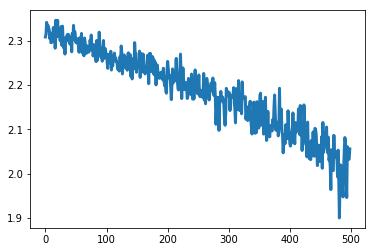

In [127]:
batchsize=100
batches=int(num_samples/batchsize)-1
costs=zeros(batches)
for j in range(batches):
    costs[j]=net.train_on_batch(training_inputs[j*batchsize:(j+1)*batchsize,:], training_results[j*batchsize:(j+1)*batchsize,:])[0]
plt.plot(costs,linewidth=3)
plt.show()

In [73]:
def test_on(start,stop,dontprint=False):
    global test_inputs, test_results
    global net, predictions_probs, predictions, true_labels
    
    predictions_probs=net.predict_on_batch(test_inputs[start:stop,:])
    predictions=argmax(predictions_probs,axis=1)
    if dontprint==False:
        print("Predictions: ", predictions)
    true_labels=argmax(test_results[start:stop,:], axis=1)
    if dontprint==False:
        print("True labels: ", true_labels)

In [145]:
test_on(0,20)

Predictions:  [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
True labels:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [100]:
predictions_probs=net.predict_on_batch(test_inputs[1:10,:])

In [101]:
np.shape(predictions_probs)

(9, 10)

In [94]:
sum(predictions_probs[0])

1.0

In [102]:
predictions=argmax(predictions_probs,axis=1)

In [103]:
predictions

array([2, 1, 0, 4, 1, 7, 8, 6, 7])

In [83]:
argmax(predictions_probs[0])

2

In [84]:
argmax?

In [85]:
def display_mistakes(maxnum):
    global test_inputs, rest_results, num_test_samples
    global true_labels, predictions, predictions_probs
    
    test_on(0,num_test_samples,dontprint=True)
    which=where(true_labels!=predictions)[0]
    for j in which:
        if j<maxnum:
            display_image(j)
            print("True ", true_labels[j], " - Predicted ", predictions[j], " with prob. ", predictions_probs[j,predictions[j]])
        

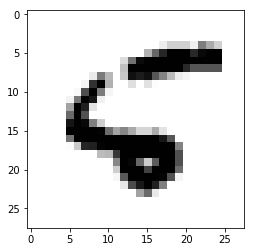

True  5  - Predicted  6  with prob.  0.8649116


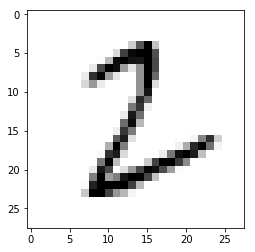

True  2  - Predicted  3  with prob.  0.53473634


In [143]:
display_mistakes(100)

In [138]:
Sequential.fit?

In [147]:
init_net()

In [148]:
history=net.fit(training_inputs,training_results,batch_size=100,epochs=30,validation_split=0.1)

Epoch 1/30
450/450 [==============================] - 2s 4ms/step - loss: 2.1979 - accuracy: 0.2291 - val_loss: 2.0157 - val_accuracy: 0.4344
Epoch 2/30
450/450 [==============================] - 2s 4ms/step - loss: 1.7883 - accuracy: 0.5100 - val_loss: 1.4394 - val_accuracy: 0.6718
Epoch 3/30
450/450 [==============================] - 1s 3ms/step - loss: 1.2534 - accuracy: 0.6830 - val_loss: 0.9443 - val_accuracy: 0.7756
Epoch 4/30
450/450 [==============================] - 1s 3ms/step - loss: 0.9184 - accuracy: 0.7483 - val_loss: 0.7140 - val_accuracy: 0.8144
Epoch 5/30
450/450 [==============================] - 1s 3ms/step - loss: 0.7548 - accuracy: 0.7823 - val_loss: 0.6054 - val_accuracy: 0.8346
Epoch 6/30
450/450 [==============================] - 2s 3ms/step - loss: 0.6672 - accuracy: 0.8045 - val_loss: 0.5461 - val_accuracy: 0.8442
Epoch 7/30
450/450 [==============================] - 2s 3ms/step - loss: 0.6083 - accuracy: 0.8196 - val_loss: 0.5051 - val_accuracy: 0.8536
Epoch 

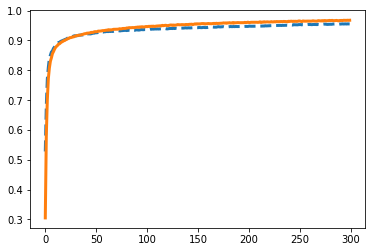

In [139]:
plt.plot(history.history['val_accuracy'], linewidth=3, ls="--")
plt.plot(history.history['accuracy'], linewidth=3)
plt.show()

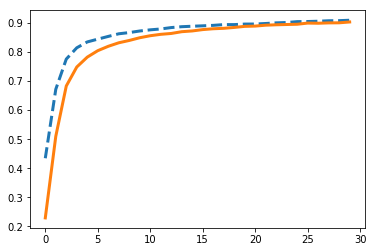

In [150]:
plt.plot(history.history['val_accuracy'], linewidth=3, ls="--")
plt.plot(history.history['accuracy'], linewidth=3)
plt.show()

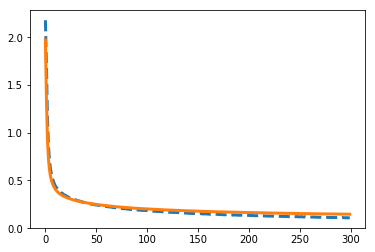

In [140]:
plt.plot(history.history['loss'], linewidth=3, ls="--")
plt.plot(history.history['val_loss'], linewidth=3)

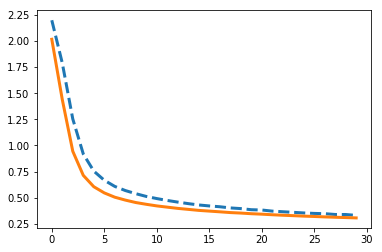

In [149]:
plt.plot(history.history['loss'], linewidth=3, ls="--")
plt.plot(history.history['val_loss'], linewidth=3)

In [141]:
fig=plt.figure()
plt.plot(history.history['categorical_accuracy'], linewidth=3)
plt.plot(history.history['val_categorical_accuracy'], linewidth=3)
plt.show()

KeyError: 'categorical_accuracy'

<Figure size 432x288 with 0 Axes>

In [151]:
tf.keras.metrics?

In [ ]:
##### do the same task using convolutional network ###

In [152]:
from keras.layers import Dense, Conv2D
from keras.layers.noise import GaussianDropout
from keras.layers import Flatten, AveragePooling2D, UpSampling2D

In [153]:
global training_inputs, test_inputs
global num_samples, num_test_samples
global M

In [154]:
numpixels=784
M=28

In [300]:
training_inputs=reshape(training_inputs,[num_samples,M,M,1])#[:,::-1,:,:]
test_inputs=reshape(test_inputs,[num_test_samples,M,M,1])#[:,::-1,:,:]

In [301]:
np.shape(training_inputs1[0])

(28, 28, 1)

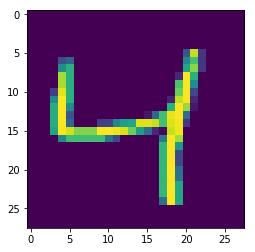

In [256]:
plt.imshow(training_inputs1[2][:,:,0])

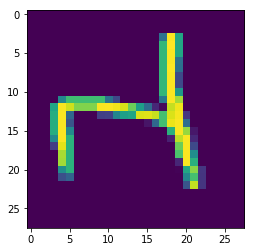

In [258]:
plt.imshow(training_inputs1[2][:,:,0])

In [210]:
a = np.arange(2*4).reshape((2, 4))

In [211]:
a

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [192]:
np.shape(training_inputs)

(50000, 784)

In [212]:
np.shape(a)

(2, 4)

In [251]:
b=reshape(a,[2,2,2])
c=reshape(a,[2,2,2,1])
c1=reshape(a,[2,2,2,1])[:,::-1,:,:]

In [214]:
print(b)

[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


In [252]:
c

array([[[[0],
         [1]],

        [[2],
         [3]]],


       [[[4],
         [5]],

        [[6],
         [7]]]])

In [253]:
c1

array([[[[2],
         [3]],

        [[0],
         [1]]],


       [[[6],
         [7]],

        [[4],
         [5]]]])

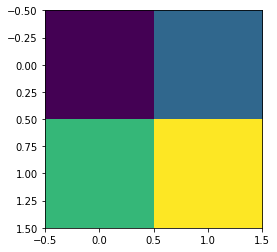

In [207]:
plt.imshow(b[0])

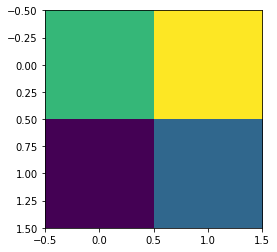

In [254]:
plt.imshow(c1[0][:,:,0])

In [242]:
print(c[0])

[[[0]
  [1]]

 [[2]
  [3]]]


In [243]:
b[0]

array([[0, 1],
       [2, 3]])

In [241]:
c[0][0][0][0]

0

In [249]:
c[0][0:1,0:1,0]

array([[0]])

In [260]:
# initialize the convolutional network
def init_net_conv_twolayer():
    global net, numpixels
    net = Sequential()
    net.add(Conv2D(input_shape=(M,M,1), filters=8, kernel_size=[5,5],activation='relu',padding='same'))
    net.add(AveragePooling2D(pool_size=2))
    net.add(Conv2D(filters=8, kernel_size=[5,5],activation='relu',padding='same'))    
    net.add(AveragePooling2D(pool_size=2))
    net.add(Flatten())
    net.add(Dense(10, activation='softmax'))
    net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [302]:
init_net_conv_twolayer()

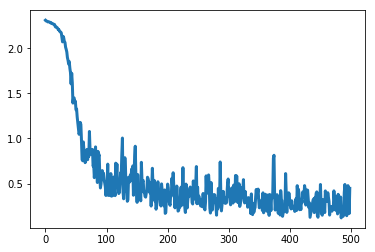

In [303]:
batchsize=100
batches=int(num_samples/batchsize)-1
costs=zeros(batches)
for j in range(batches):
    costs[j]=net.train_on_batch(training_inputs[j*batchsize:(j+1)*batchsize,:,:,:], training_results[j*batchsize:(j+1)*batchsize,:])[0]
plt.plot(costs,linewidth=3)
plt.show()

In [266]:
history=net.fit(training_inputs,training_results,batch_size=100,epochs=50,validation_split=0.1)

Epoch 1/50
450/450 [==============================] - 20s 44ms/step - loss: 0.0241 - categorical_accuracy: 0.9924 - val_loss: 0.0643 - val_categorical_accuracy: 0.9804
Epoch 2/50
450/450 [==============================] - 20s 45ms/step - loss: 0.0242 - categorical_accuracy: 0.9926 - val_loss: 0.0591 - val_categorical_accuracy: 0.9812
Epoch 3/50
450/450 [==============================] - 20s 45ms/step - loss: 0.0223 - categorical_accuracy: 0.9931 - val_loss: 0.0646 - val_categorical_accuracy: 0.9800
Epoch 4/50
450/450 [==============================] - 20s 43ms/step - loss: 0.0210 - categorical_accuracy: 0.9933 - val_loss: 0.0707 - val_categorical_accuracy: 0.9786
Epoch 5/50
450/450 [==============================] - 20s 45ms/step - loss: 0.0213 - categorical_accuracy: 0.9932 - val_loss: 0.0698 - val_categorical_accuracy: 0.9808
Epoch 6/50
450/450 [==============================] - 19s 43ms/step - loss: 0.0210 - categorical_accuracy: 0.9933 - val_loss: 0.0698 - val_categorical_accuracy:

450/450 [==============================] - 20s 45ms/step - loss: 0.0065 - categorical_accuracy: 0.9980 - val_loss: 0.0897 - val_categorical_accuracy: 0.9812
Epoch 50/50
450/450 [==============================] - 22s 49ms/step - loss: 0.0058 - categorical_accuracy: 0.9983 - val_loss: 0.0954 - val_categorical_accuracy: 0.9796


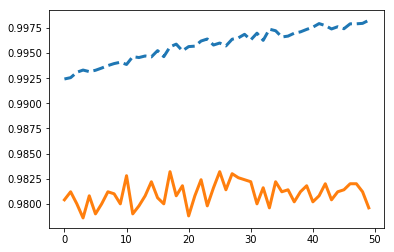

In [268]:
fig=plt.figure()
plt.plot(history.history['categorical_accuracy'], linewidth=3, ls="--")
plt.plot(history.history['val_categorical_accuracy'], linewidth=3)
plt.show()

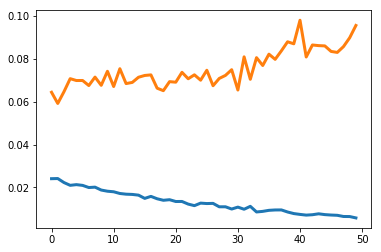

In [270]:
fig=plt.figure()
plt.plot(history.history['loss'], linewidth=3)
plt.plot(history.history['val_loss'], linewidth=3)
plt.show()

In [286]:
def rescale_image(img):
    mn=img.min()
    mx=img.max()
    return((img-mn)/(mx-mn+1e-10))


def display_filters(which_layer):
    global BigImage
    
    the_layers=net.layers
    filters=the_layers[which_layer].get_weights()[0]
    s=shape(filters)
    MX=s[0]
    MY=s[1]
    num_in=s[2] # number of input channels
    num_out=s[3] # number of output channels
    BigImage=zeros([num_in*(MX+1),num_out*(MY+1)])
    BigImage[:,:]=1.0
    for j_in in range(num_in):
        for j_out in range(num_out):
            BigImage[j_in*(MX+1):(j_in+1)*(MX+1)-1,j_out*(MY+1):(j_out+1)*(MY+1)-1]=rescale_image(filters[:,:,j_in,j_out])
    plt.imshow(BigImage,origin='lower',interpolation='nearest',cmap='binary')
    plt.axis('off')
    plt.show()

In [285]:
display_filters(3)

IndexError: tuple index out of range

In [294]:
the_layers=net.layers
filters=the_layers[0].get_weights()

In [295]:
filters

[array([[[[-1.00402844e+00,  2.85153478e-01, -7.19250083e-01,
           -2.45902970e-01, -6.09752797e-02, -2.18827233e-01,
            4.60349083e-01,  2.30639249e-01]],
 
         [[-7.19317913e-01,  3.82770360e-01, -1.26479018e+00,
           -1.73074856e-01,  4.25239265e-01, -4.33503240e-02,
            5.73794067e-01,  6.77168608e-01]],
 
         [[-1.64438516e-01,  3.42483044e-01, -1.55182099e+00,
            8.77184942e-02,  4.37865883e-01,  1.73041895e-01,
            5.45959234e-01,  6.30210578e-01]],
 
         [[-1.43779412e-01,  2.23399490e-01, -1.13460302e+00,
            1.93459153e-01,  1.05618358e-01,  5.64141385e-02,
            2.12964177e-01,  6.05356038e-01]],
 
         [[ 2.17328623e-01, -1.05383605e-01, -1.95224047e-01,
            9.71119478e-02, -3.69190395e-01, -1.64251521e-01,
           -1.80127248e-01,  5.30984521e-01]]],
 
 
        [[[-2.25181714e-01,  9.62703705e-01,  3.74964356e-01,
           -1.37147866e-02,  1.25382543e-01, -3.22924107e-01,
        